Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [2]:
# Defining the k-means
k_equals_three = KMeans(n_clusters=3)

# Fit model
%timeit k_equals_three.fit(X_std)
y_pred = k_equals_three.predict(X_std)

54.5 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


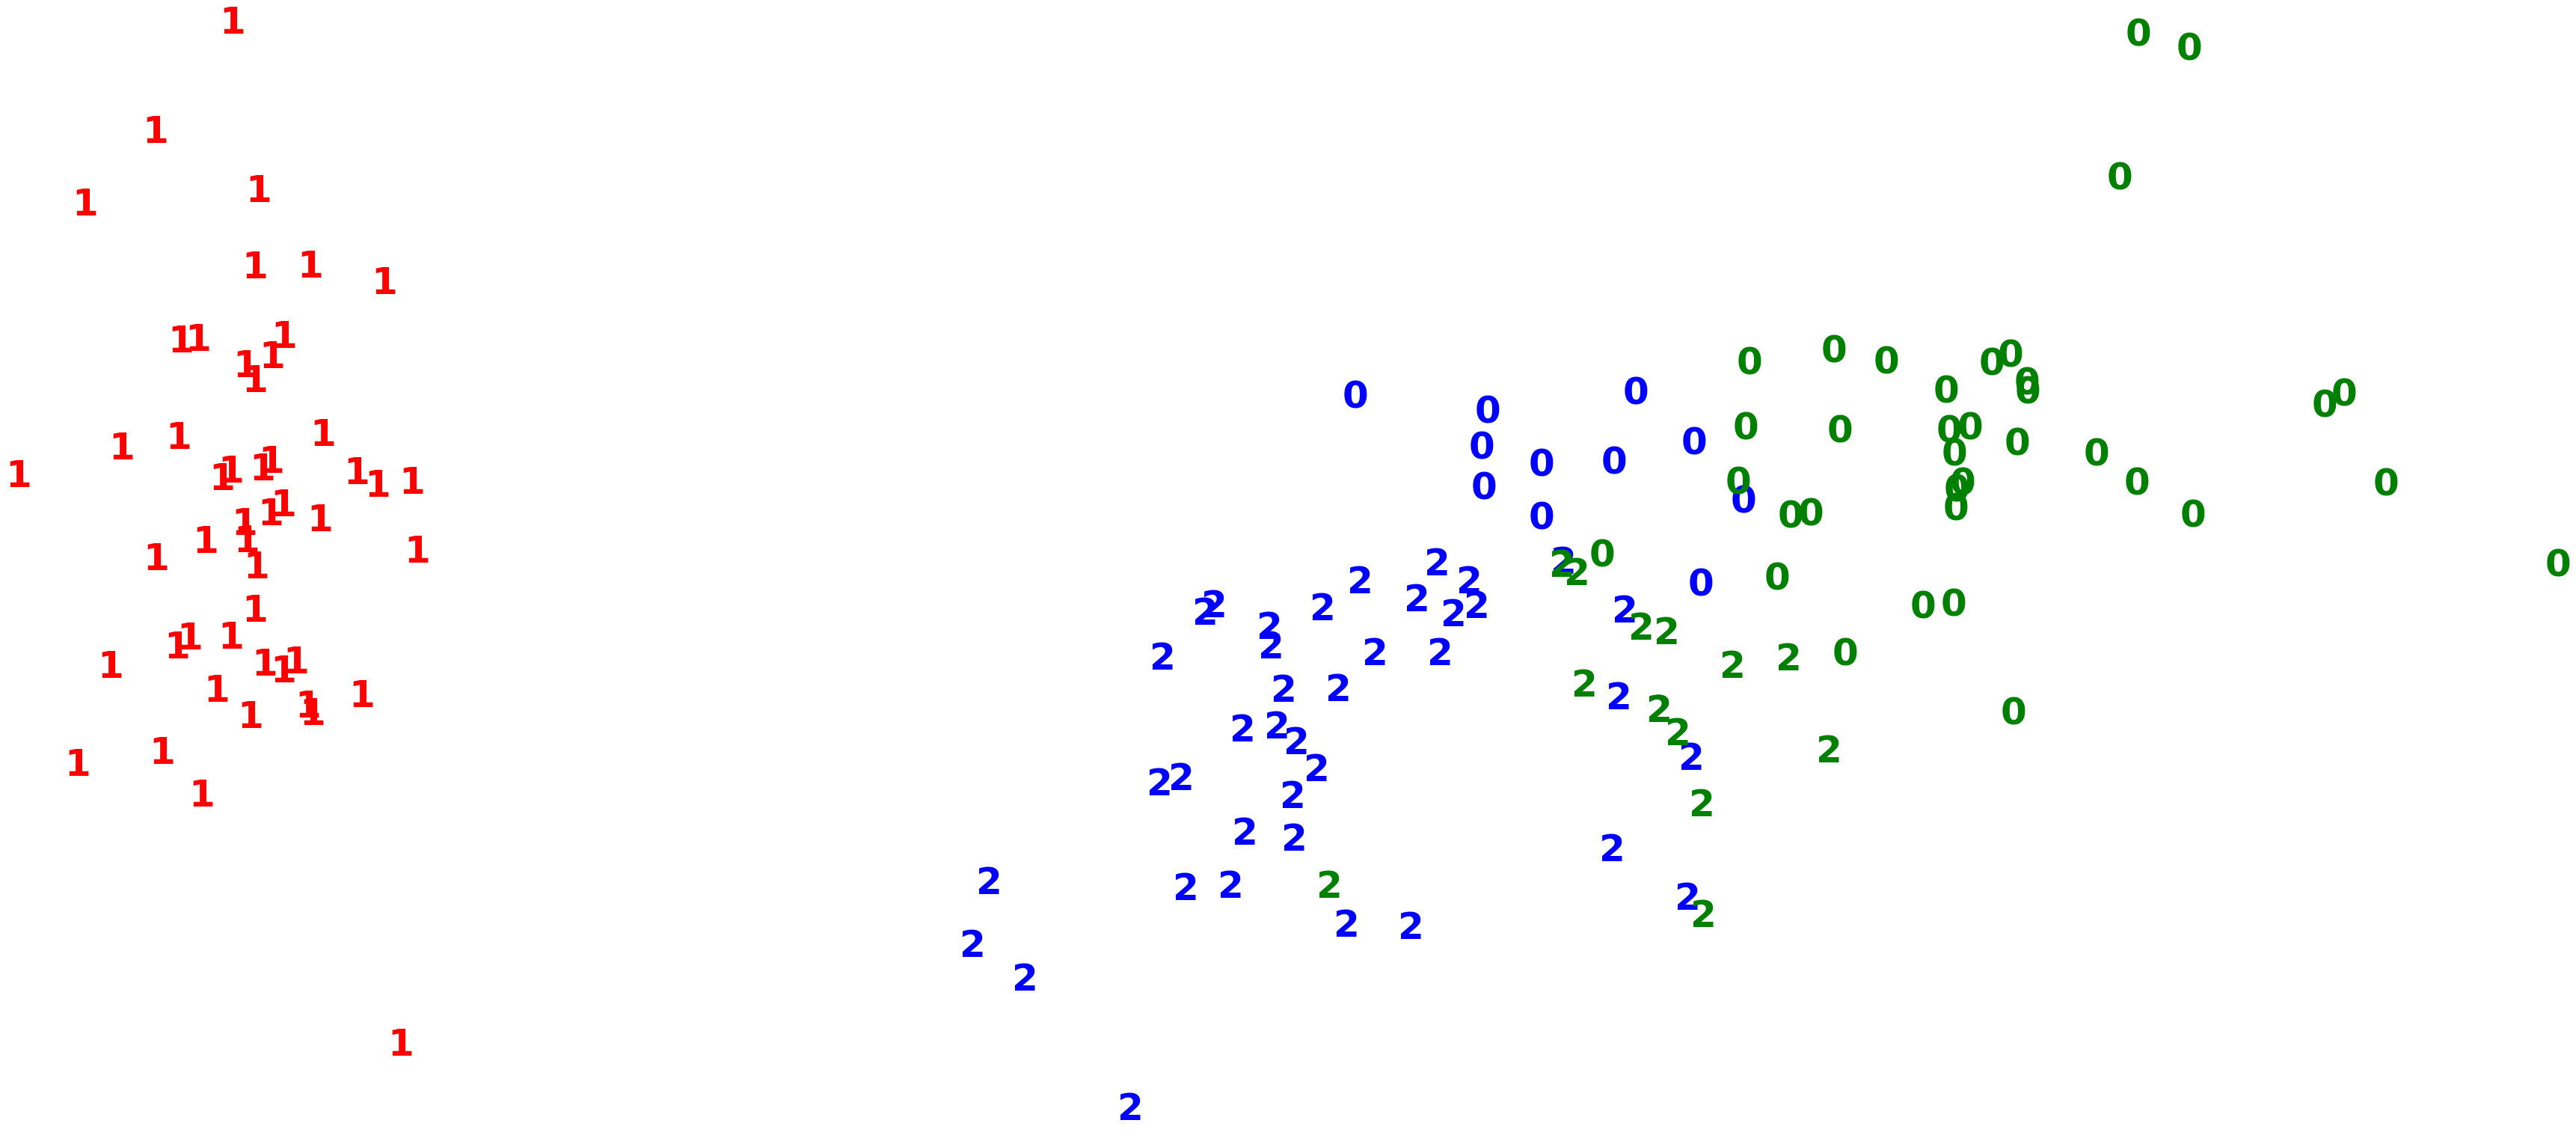

In [3]:
pca = PCA().fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [4]:
# Defining the k-means
k_equals_four = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit k_equals_four.fit(X_std)
y_pred = k_equals_four.predict(X_std)

91.2 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


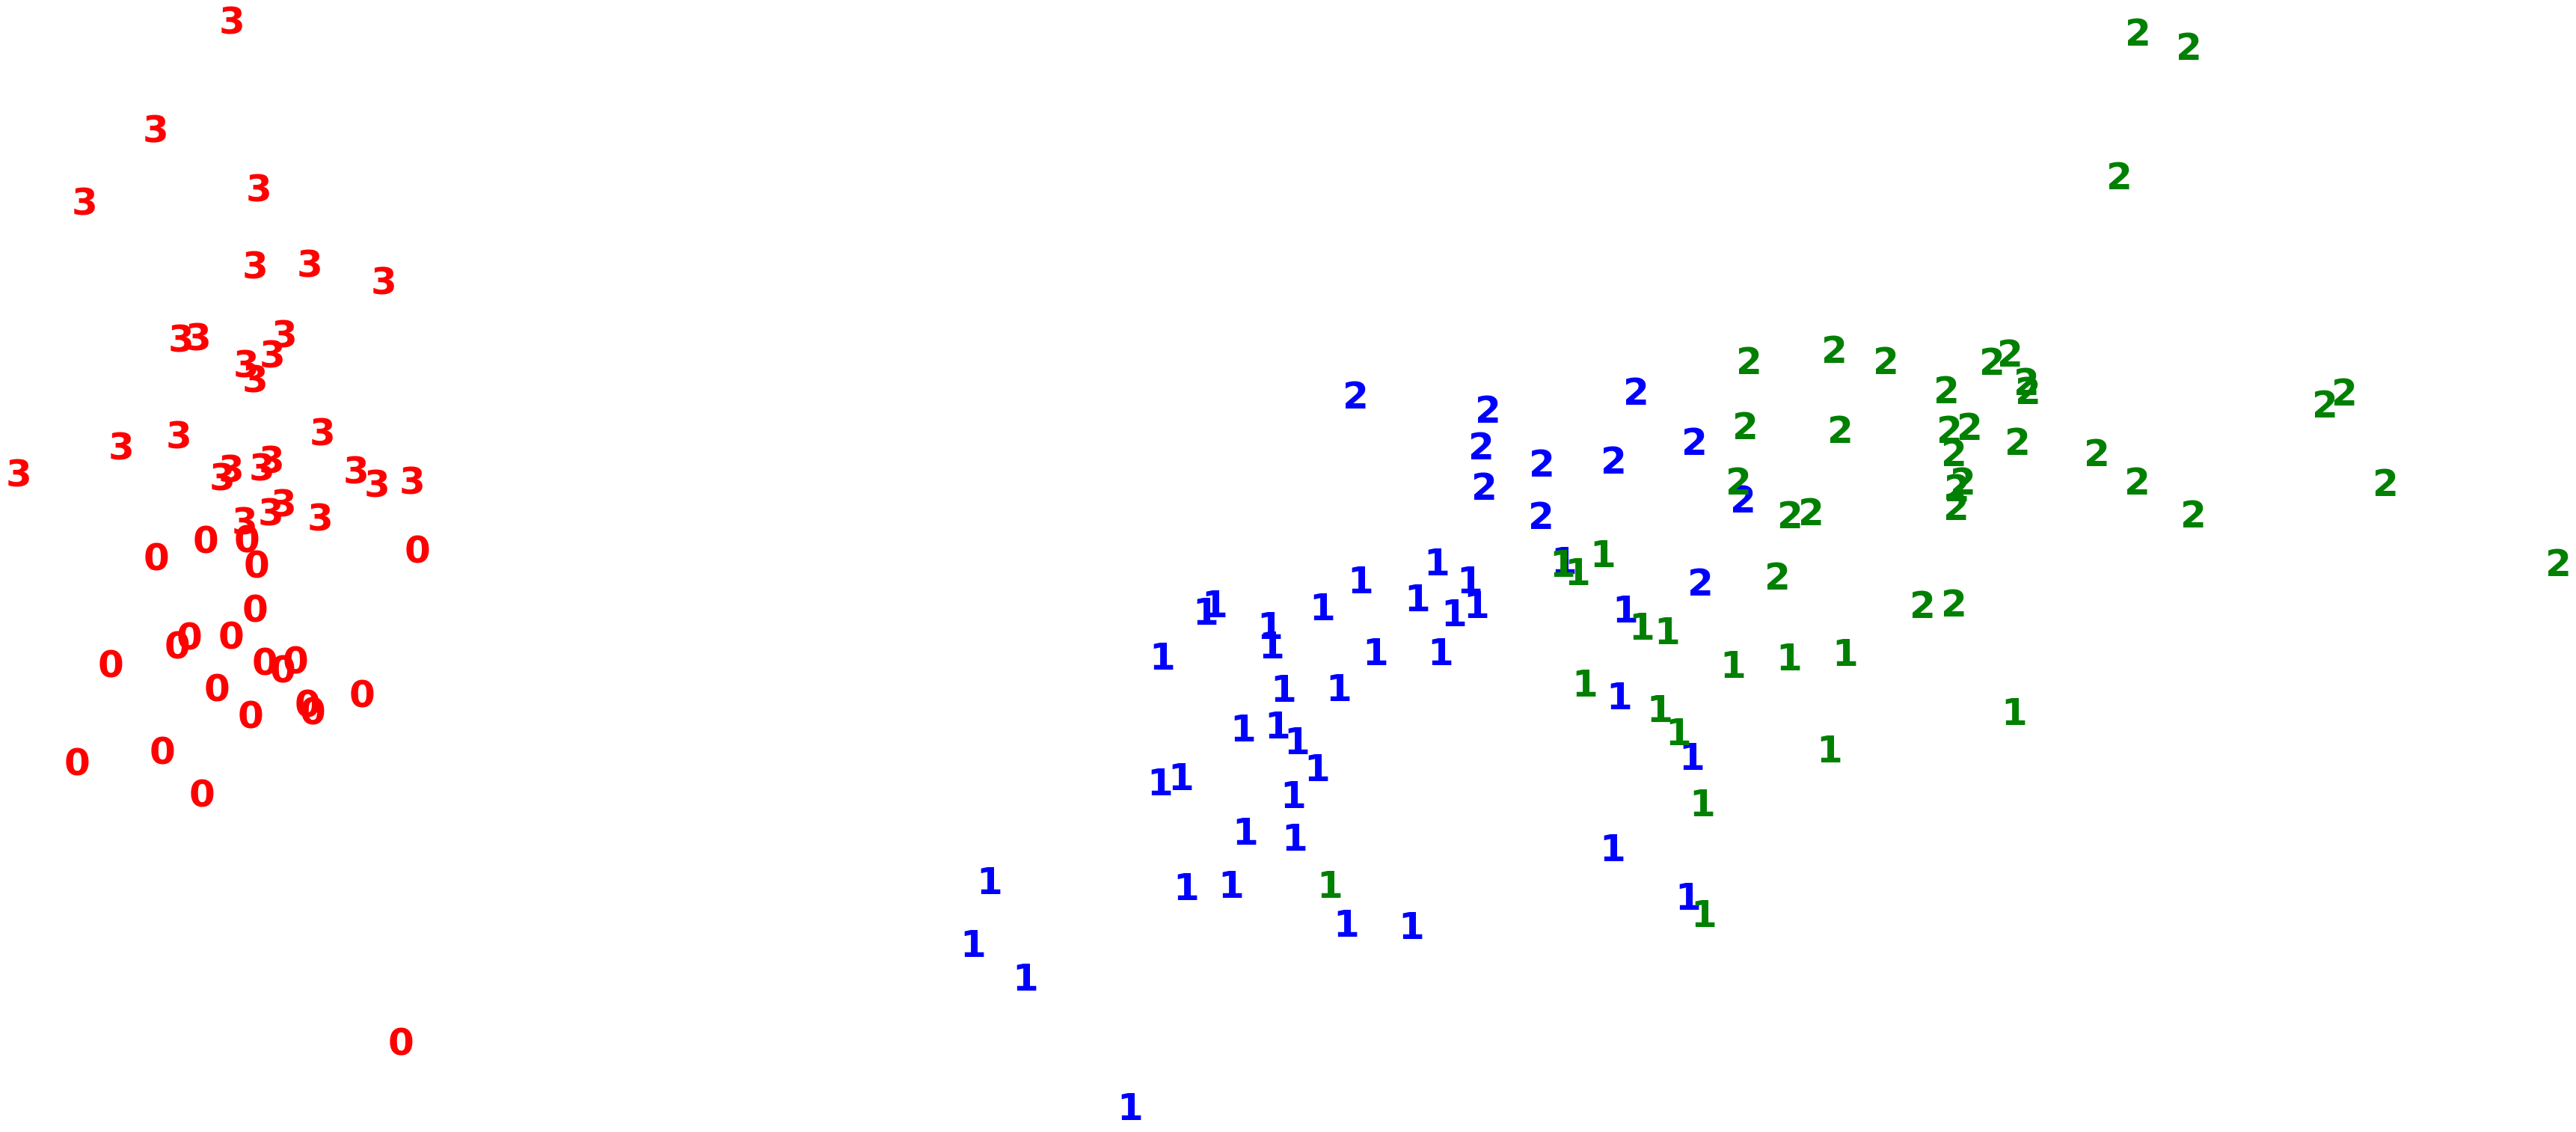

In [5]:
pca = PCA().fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [6]:
# Defining the k-means
k_equals_five = KMeans(n_clusters=5)

# Fit model
%timeit k_equals_five.fit(X_std)
y_pred = k_equals_five.predict(X_std)

108 ms ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


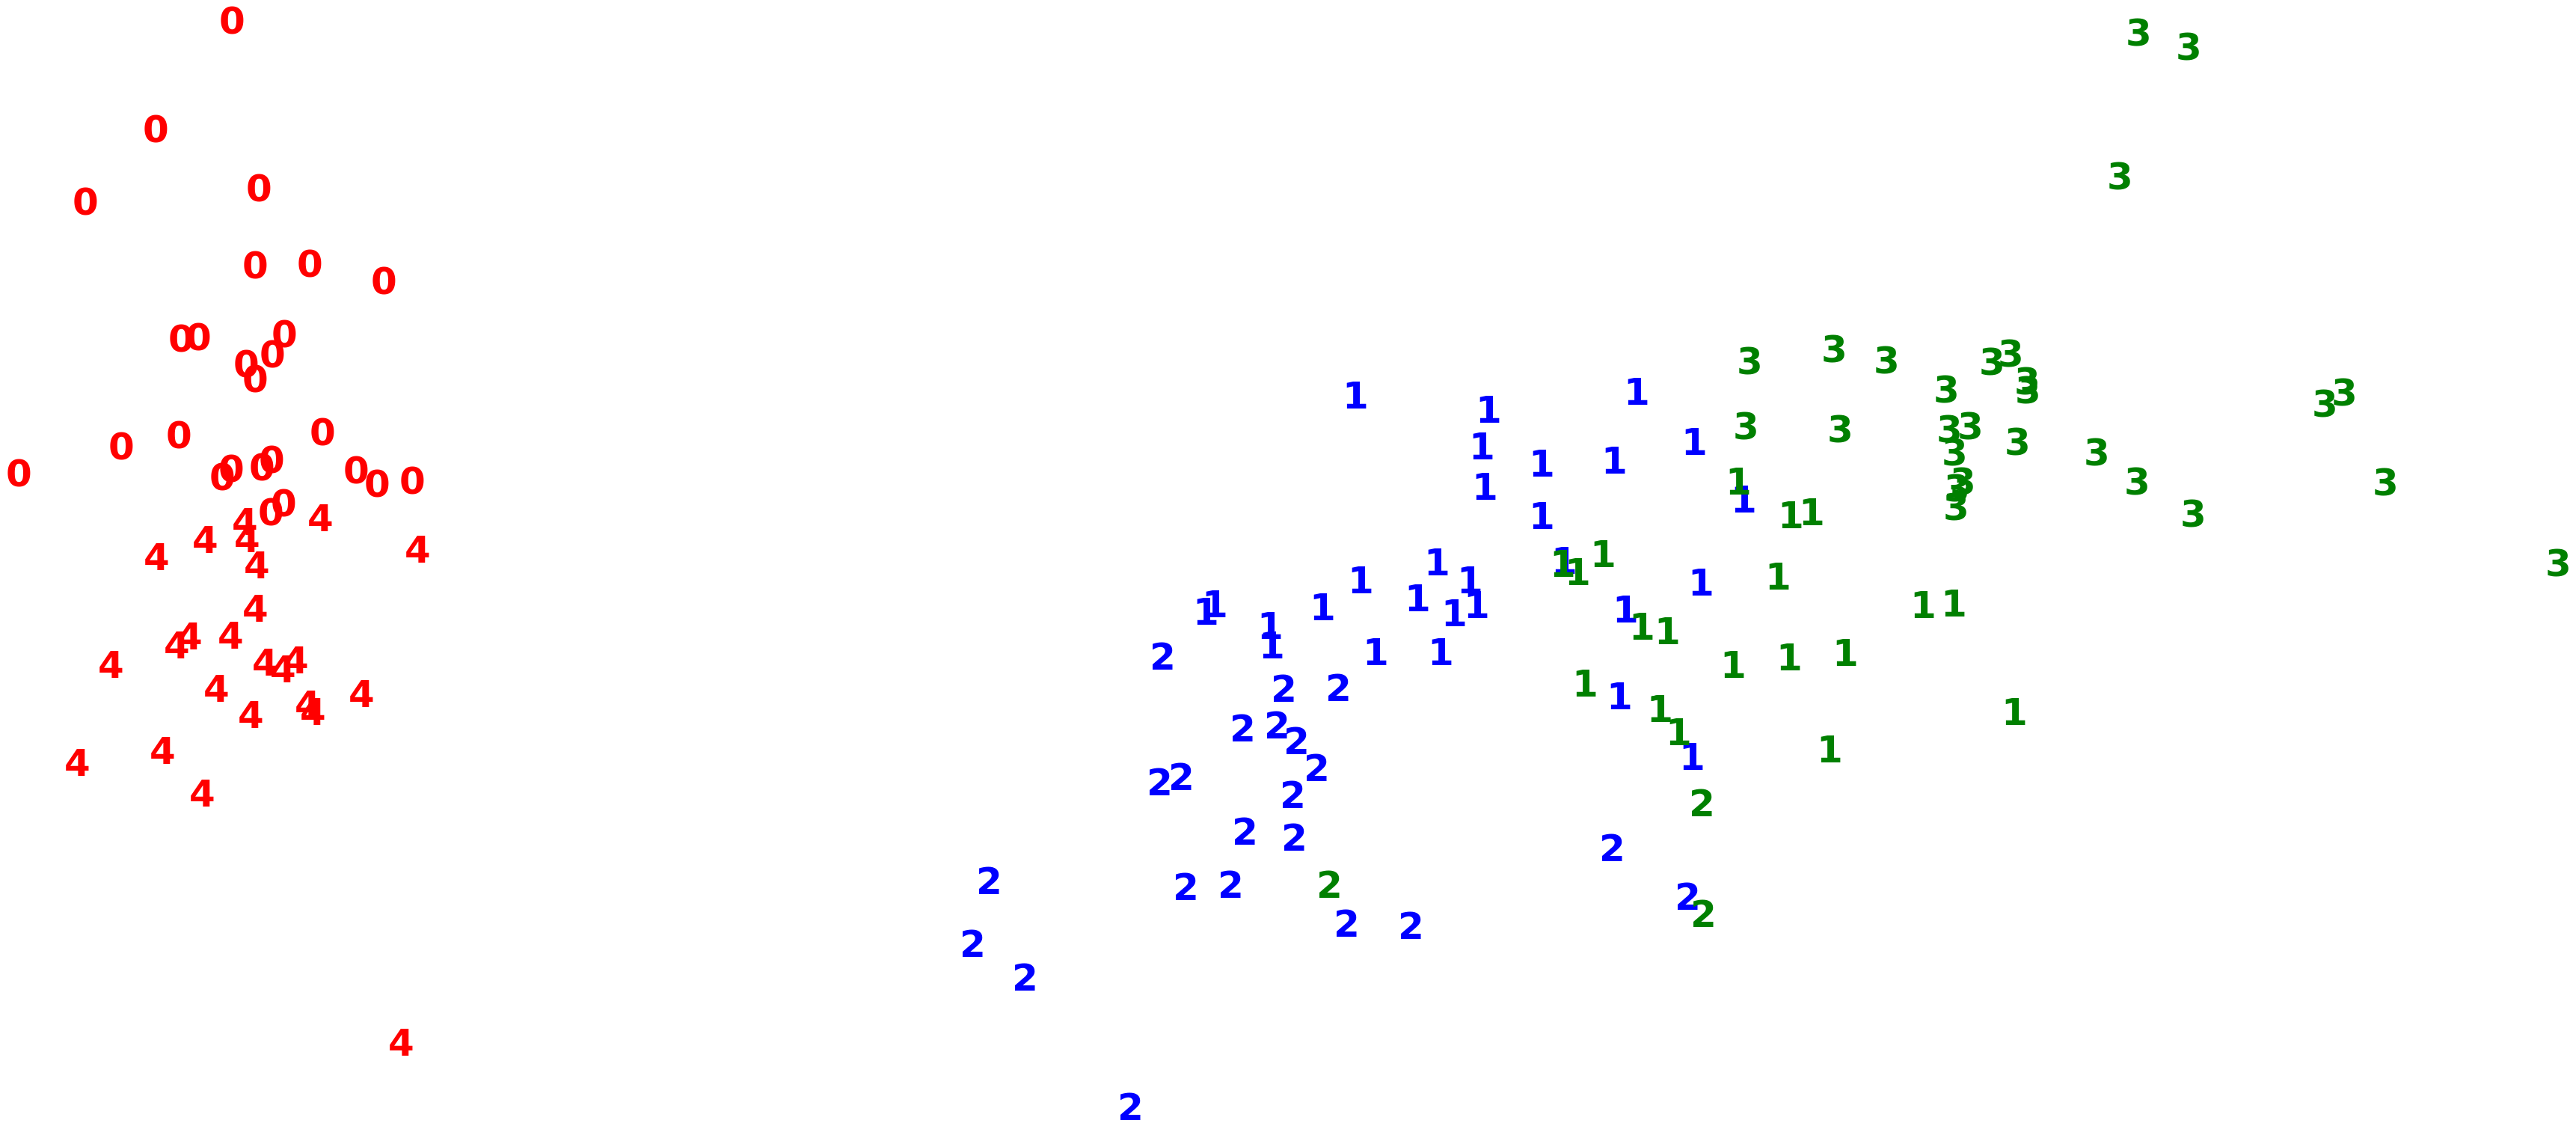

In [7]:
pca = PCA().fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

k=3 still produces the best results. I was hoping that with k=4 or k=5 that two groups together would better define the "green" irises, but it doesn't appear that way to me. 

In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

In [11]:
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [12]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [13]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Defining the k-means
k_means_heart_two = KMeans(n_clusters=2)

# Fit model
%timeit k_means_heart_two.fit(X_std)
y_pred = k_means_heart_two.predict(X_std)

67.2 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


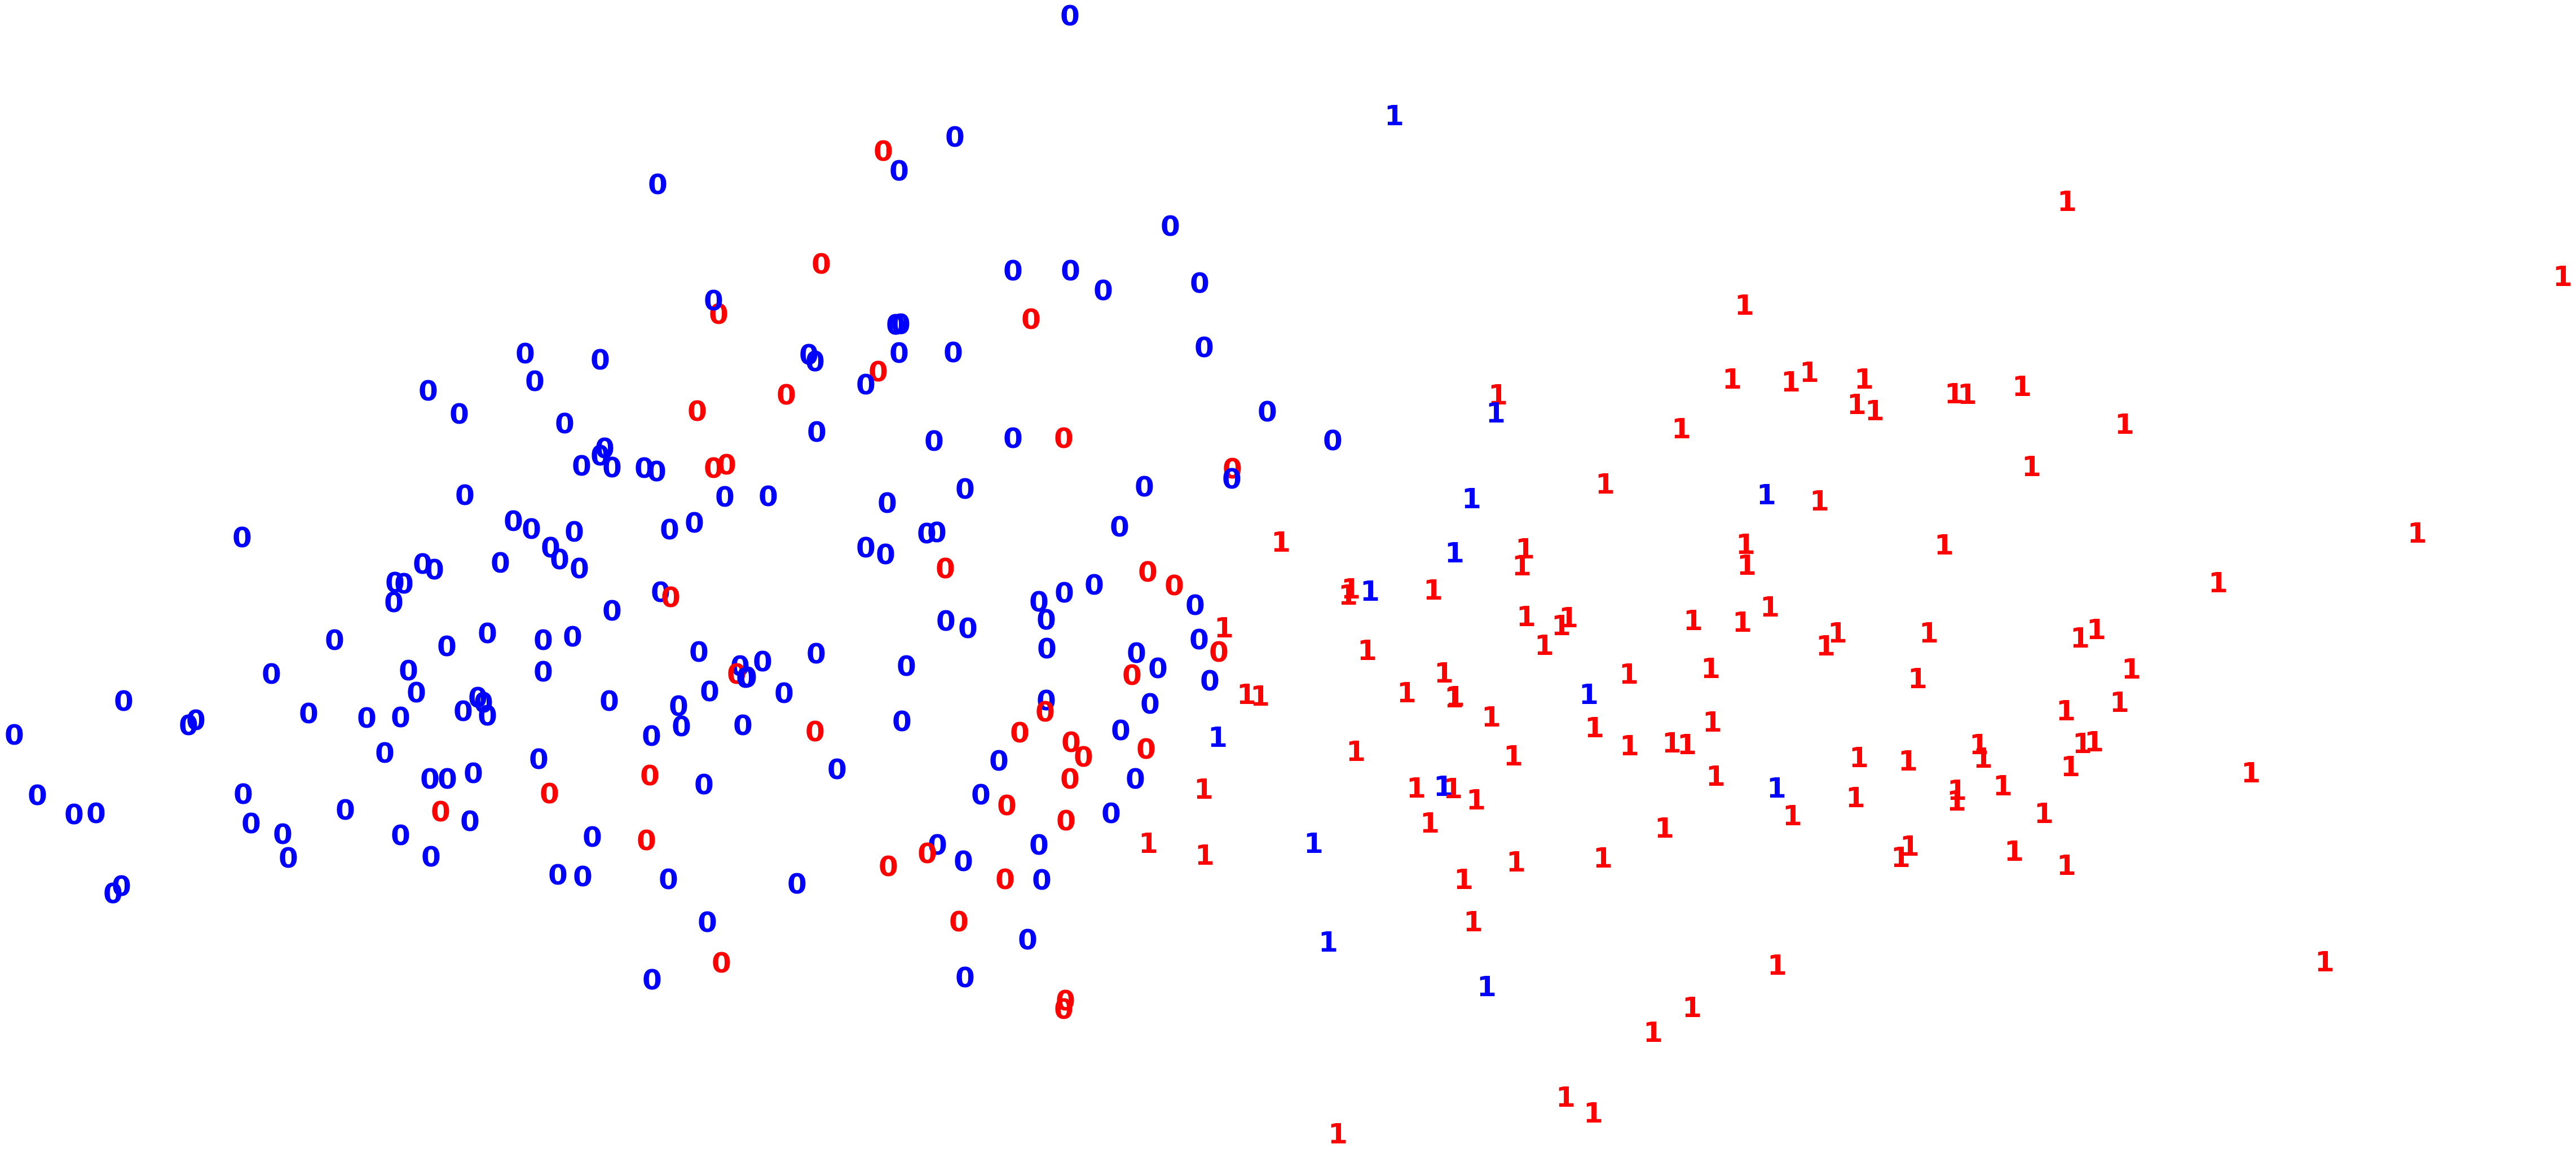

In [14]:
pca = PCA().fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()